In [11]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
consumerKey = "SCXJOdWHrc9zWEFHf1Ha7kmc1"
consumerSecret = "72QzzKBXBTCFb0Po2Np4yNUrZ7yEHImlfxLyQxcCL3QV8S3CPN"
accessToken = "1270624123329208320-g6dwbbOVoEPAqDJRpJrfg1smboKJ33"
accessTokenSecret = "s2ee7pvNL7XUePYEilI30hA3izU6YLj3pDSSWXYqZHOZ8"

In [13]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [14]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="ArvindKejriwal", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Congratulations and best wishes @Amitjanhit God bless both of u https://t.co/7FQpQnTMTt

2) Delhi govt has started an Integrated Command and Control Centre (ICCC). Data related to hospitals, oxygen, vaccination and other aspects of covid management are collected, collated and analysed on real time basis. It will help us in making informed decision making https://t.co/WWrmP1VJxS

3) RT @ColAjayKothiyal: उत्तराखंड में कोरोना संक्रमितों की मदद के लिए आम आदमी पार्टी ने आज ‘आप का डॉक्टर' अभियान की शुरुआत की है। हेल्पलाइन नं…

4) I pray to God for his speedy recovery and good health https://t.co/VzLjTnT3Rm

5) आज से हम ऑक्सीजन कंसंट्रेटर बैंक की जरूरी सेवा शुरू कर रहे हैं।

कोरोना मरीजों को समय पर ऑक्सीजन मिलना बहुत जरूरी है। इससे हम बहुत जानें बचा पाएंगे।

होम आइसोलेशन में इलाज करा रहे किसी भी कोरोना मरीज को जरूरत पड़ने पर दो घंटे के अंदर उनके घर तक ऑक्सीजन कंसंट्रेटर पहुंचाया जाएगा। https://t.co/1Q9xXyIWK5



In [15]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,Congratulations and best wishes @Amitjanhit Go...
1,Delhi govt has started an Integrated Command a...
2,RT @ColAjayKothiyal: उत्तराखंड में कोरोना संक्...
3,I pray to God for his speedy recovery and good...
4,आज से हम ऑक्सीजन कंसंट्रेटर बैंक की जरूरी सेवा...


In [16]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Congratulations and best wishes God bless bot...
1,Delhi govt has started an Integrated Command a...
2,: उत्तराखंड में कोरोना संक्रमितों की मदद के लि...
3,I pray to God for his speedy recovery and good...
4,आज से हम ऑक्सीजन कंसंट्रेटर बैंक की जरूरी सेवा...
...,...
94,_Smera: Got my 1st jab today! Systems put in p...
95,इस महामारी के दौरान हमारे डॉक्टर और नर्सों ने ...
96,"_talk10: Today, under the pretext of vaccinati..."
97,"_chadha: Fret not, have assigned 3 D type cyli..."


In [17]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Congratulations and best wishes God bless bot...,0.300000,1.000
1,Delhi govt has started an Integrated Command a...,0.358333,0.025
2,: उत्तराखंड में कोरोना संक्रमितों की मदद के लि...,0.000000,0.000
3,I pray to God for his speedy recovery and good...,0.600000,0.700
4,आज से हम ऑक्सीजन कंसंट्रेटर बैंक की जरूरी सेवा...,0.000000,0.000
...,...,...,...
94,_Smera: Got my 1st jab today! Systems put in p...,0.500000,0.400
95,इस महामारी के दौरान हमारे डॉक्टर और नर्सों ने ...,0.000000,0.000
96,"_talk10: Today, under the pretext of vaccinati...",0.000000,0.000
97,"_chadha: Fret not, have assigned 3 D type cyli...",0.500000,0.000


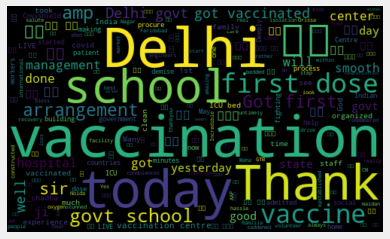

In [18]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Congratulations and best wishes God bless bot...,0.300000,1.000,Positive
1,Delhi govt has started an Integrated Command a...,0.358333,0.025,Positive
2,: उत्तराखंड में कोरोना संक्रमितों की मदद के लि...,0.000000,0.000,Neutral
3,I pray to God for his speedy recovery and good...,0.600000,0.700,Positive
4,आज से हम ऑक्सीजन कंसंट्रेटर बैंक की जरूरी सेवा...,0.000000,0.000,Neutral
...,...,...,...,...
94,_Smera: Got my 1st jab today! Systems put in p...,0.500000,0.400,Positive
95,इस महामारी के दौरान हमारे डॉक्टर और नर्सों ने ...,0.000000,0.000,Neutral
96,"_talk10: Today, under the pretext of vaccinati...",0.000000,0.000,Neutral
97,"_chadha: Fret not, have assigned 3 D type cyli...",0.500000,0.000,Neutral


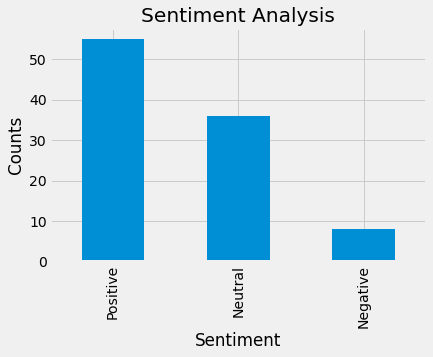

In [20]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()